<a href="https://colab.research.google.com/github/practicatto/Intro-Polars/blob/main/Polars_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeros Pasos en Polars 🤓
Este notebook es usado como material para explicar las características core de Polars en IWD Camino Ecuador 2024

In [ ]:
!pip install polars plotly matplotlib pandas

In [ ]:
import polars as pl
import pandas as pd
import time

# Setup configurations
Podemos setear polars con varias configuraciones, ahora revisaremos una, chequea el resto en [aquí!!](https://pola-rs.github.io/polars/py-polars/html/reference/config.html)

In [ ]:
pl.Config.set_fmt_str_lengths(100)

polars.config.Config

# Leamos un archivo!
Polars puede leer múltiples archivos: JSON, CSV, PARQUET, ARROW, EXCEL y también conexiones de bases.

### Sobre nuestro dataset
Titanic

Tamaño de dataset: 28 kb

Formato: csv



In [ ]:
file="/content/drive/MyDrive/dataset_polars/titanic.csv"

In [ ]:
start_time_pandas = time.time()
pd_df = pd.read_csv(file)
time_taken_pandas = time.time() - start_time_pandas

print(f"Time taken by Pandas: {time_taken_pandas*1000} milliseconds")

Time taken by Pandas: 39.333343505859375 milliseconds


In [ ]:
start_time_polars = time.time()
pl_df = pl.read_csv(file)
time_taken_polars = time.time() - start_time_polars
print(f"Time taken by Polars: {time_taken_polars*1000} milliseconds")

Time taken by Polars: 246.70124053955078 milliseconds


In [ ]:
pl_df.head()

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,str,str,f64,i64,i64,str,f64,str,str
892,3,"""Kelly, Mr. Jam…","""male""",34.5,0,0,"""330911""",7.8292,null,"""Q"""
893,3,"""Wilkes, Mrs. J…","""female""",47.0,1,0,"""363272""",7.0,null,"""S"""
894,2,"""Myles, Mr. Tho…","""male""",62.0,0,0,"""240276""",9.6875,null,"""Q"""
895,3,"""Wirz, Mr. Albe…","""male""",27.0,0,0,"""315154""",8.6625,null,"""S"""
896,3,"""Hirvonen, Mrs.…","""female""",22.0,1,1,"""3101298""",12.2875,null,"""S"""


In [ ]:
# Ver información general en pandas
pd_df.info()

# Ver las estadisticas
pd_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
pl_df.describe()

describe,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
str,f64,f64,str,str,f64,f64,f64,str,f64,str,str
"""count""",418.0,418.0,"""418""","""418""",332.0,418.0,418.0,"""418""",417.0,"""91""","""418"""
"""null_count""",0.0,0.0,"""0""","""0""",86.0,0.0,0.0,"""0""",1.0,"""327""","""0"""
"""mean""",1100.5,2.26555,null,null,30.27259,0.447368,0.392344,null,35.627188,null,null
"""std""",120.810458,0.841838,null,null,14.181209,0.89676,0.981429,null,55.907576,null,null
"""min""",892.0,1.0,"""Abbott, Master…","""female""",0.17,0.0,0.0,"""110469""",0.0,"""A11""","""C"""
"""25%""",996.0,1.0,null,null,21.0,0.0,0.0,null,7.8958,null,null
"""50%""",1101.0,3.0,null,null,27.0,0.0,0.0,null,14.4542,null,null
"""75%""",1205.0,3.0,null,null,39.0,1.0,0.0,null,31.5,null,null
"""max""",1309.0,3.0,"""van Billiard, …","""male""",76.0,8.0,9.0,"""W.E.P. 5734""",512.3292,"""G6""","""S"""


In [ ]:
#ver valores de embarcado
pd_df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
#ver valores de embarcado polars
pl_df["Embarked"].value_counts()

Embarked,count
str,u32
"""Q""",46
"""C""",102
"""S""",270


In [ ]:
#slice dataframe

pd_df[12:28]

pl_df[12:28]

In [ ]:
#ver si habian adolescentes en el titanic

pd_df[pd_df['Age'].between(13, 19)]


In [ ]:
pl_df.filter(pl_df['Age'].is_between(13, 19))

In [ ]:
#llenar valores vacios

pd_df['Embarked'].fillna('S', inplace = True)


In [ ]:
pl_df = pl_df.with_columns(pl.col('Embarked').fill_null('S'))


In [ ]:
#agrupar por sexo y clase

pd_df.groupby(by = ['Pclass', 'Sex']).count()


PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  Cabin  \
Pclass Sex                                                                 
1      female           50    50   48     50     50      50    50     40   
       male             57    57   50     57     57      57    57     40   
2      female           30    30   29     30     30      30    30      3   
       male             63    63   59     63     63      63    63      4   
3      female           72    72   50     72     72      72    72      1   
       male            146   146   96    146    146     146   145      3   

               Embarked  
Pclass Sex               
1      female        50  
       male          57  
2      female        30  
       male          63  
3      female        72  
       male         146

In [ ]:
pl_df.groupby(by = ['Pclass', 'Sex']).count()

<ipython-input-35-d28c6a695643>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  pl_df.groupby(by = ['Pclass', 'Sex']).count()


Pclass,Sex,count
i64,str,u32
3,"""male""",146
3,"""female""",72
2,"""male""",63
1,"""female""",50
1,"""male""",57
2,"""female""",30


## Ordenar valores

In [ ]:
pd_df.sort_values("Age")


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S
201,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
281,1173,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
307,1199,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,NaN,S
250,1142,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
pl_df.sort("Age")

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,str,str,f64,i64,i64,str,f64,str,str
902,3,"""Ilieff, Mr. Yl…","""male""",null,0,0,"""349220""",7.8958,null,"""S"""
914,1,"""Flegenheim, Mr…","""female""",null,0,0,"""PC 17598""",31.6833,null,"""S"""
921,3,"""Samaan, Mr. El…","""male""",null,2,0,"""2662""",21.6792,null,"""C"""
925,3,"""Johnston, Mrs.…","""female""",null,1,2,"""W./C. 6607""",23.45,null,"""S"""
928,3,"""Roth, Miss. Sa…","""female""",null,0,0,"""342712""",8.05,null,"""S"""
931,3,"""Hee, Mr. Ling""","""male""",null,0,0,"""1601""",56.4958,null,"""S"""
933,1,"""Franklin, Mr. …","""male""",null,0,0,"""113778""",26.55,"""D34""","""S"""
939,3,"""Shaughnessy, M…","""male""",null,0,0,"""370374""",7.75,null,"""Q"""
946,2,"""Mangiavacchi, …","""male""",null,0,0,"""SC/A.3 2861""",15.5792,null,"""C"""


In [ ]:
pl_df.select(
        [
            pl.col("Pclass"),
            pl.col("Name").str.to_lowercase(),
            pl.col("Age").round(2)
        ]
    )

In [ ]:
pl_df.select(pl.col("Name")).head()

Name
str
"""Kelly, Mr. James"""
"""Wilkes, Mrs. James (Ellen Needs)"""
"""Myles, Mr. Thomas Francis"""
"""Wirz, Mr. Albert"""
"""Hirvonen, Mrs. Alexander (Helga E Lindqvist)"""


In [ ]:
#Split string values in column s in exactly 2 parts and assign each part to a new column.
pl_df.with_columns(
    [
        pl.col("Name")
        .str.splitn(" ", 2)
        .struct.rename_fields(["Last Name", "Second part"])
        .alias("fields"),
    ]
).unnest("fields")


PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,Second part
i64,i64,str,str,f64,i64,i64,str,f64,str,str,str,str
892,3,"""Kelly, Mr. James""","""male""",34.5,0,0,"""330911""",7.8292,null,"""Q""","""Kelly,""","""Mr. James"""
893,3,"""Wilkes, Mrs. James (Ellen Needs)""","""female""",47.0,1,0,"""363272""",7.0,null,"""S""","""Wilkes,""","""Mrs. James (Ellen Needs)"""
894,2,"""Myles, Mr. Thomas Francis""","""male""",62.0,0,0,"""240276""",9.6875,null,"""Q""","""Myles,""","""Mr. Thomas Francis"""
895,3,"""Wirz, Mr. Albert""","""male""",27.0,0,0,"""315154""",8.6625,null,"""S""","""Wirz,""","""Mr. Albert"""
896,3,"""Hirvonen, Mrs. Alexander (Helga E Lindqvist)""","""female""",22.0,1,1,"""3101298""",12.2875,null,"""S""","""Hirvonen,""","""Mrs. Alexander (Helga E Lindqvist)"""
897,3,"""Svensson, Mr. Johan Cervin""","""male""",14.0,0,0,"""7538""",9.225,null,"""S""","""Svensson,""","""Mr. Johan Cervin"""
898,3,"""Connolly, Miss. Kate""","""female""",30.0,0,0,"""330972""",7.6292,null,"""Q""","""Connolly,""","""Miss. Kate"""
899,2,"""Caldwell, Mr. Albert Francis""","""male""",26.0,1,1,"""248738""",29.0,null,"""S""","""Caldwell,""","""Mr. Albert Francis"""
900,3,"""Abrahim, Mrs. Joseph (Sophie Halaut Easu)""","""female""",18.0,0,0,"""2657""",7.2292,null,"""C""","""Abrahim,""","""Mrs. Joseph (Sophie Halaut Easu)"""


In [ ]:
pl_df.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
pl_df.group_by(["Survived","Pclass"]).agg(pl.col("PassengerId").count().alias("counts"))

Survived,Pclass,counts
i64,i64,u32
1,1,136
0,2,97
0,3,372
1,3,119
0,1,80
1,2,87


In [ ]:
pl_df.group_by(["Survived","Pclass"]).agg(
        pl.col("PassengerId").count().alias("counts")
      ).with_columns(
        100 * (pl.col("counts")/ pl.col("counts").sum().over("Pclass").alias("% Survived"
        )
        )
      ).sort(["Pclass", "Survived"],descending=True)


Survived,Pclass,counts,literal
i64,i64,u32,f64
1,3,119,24.236253
0,3,372,75.763747
1,2,87,47.282609
0,2,97,52.717391
1,1,136,62.962963
0,1,80,37.037037


In [ ]:
pl.scan_csv(file).group_by(
    ["Survived","Pclass"]).agg(
        pl.col("PassengerId").count().alias("counts")
    )

<LazyFrame [3 cols, {"Survived": Int64 … "counts": UInt32}] at 0x79BA4DCC7310>

In [ ]:
pl.scan_csv(file).group_by(["Survived","Pclass"]).agg(
        pl.col("PassengerId").count().alias("counts")).explain()

'AGGREGATE\n\t[col("PassengerId").count().alias("counts")] BY [col("Survived"), col("Pclass")] FROM\n\n    Csv SCAN /content/drive/MyDrive/dataset_polars/titanic.csv\n    PROJECT 3/12 COLUMNS'

In [ ]:
pl.scan_csv(file).filter(pl.col("Age") > 50).groupby(["Survived","Pclass"]).agg(
        pl.col("PassengerId").count().alias("counts")
    ).explain()

<ipython-input-117-0e9b579059a8>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  pl.scan_csv(file).filter(pl.col("Age") > 50).groupby(["Survived","Pclass"]).agg(


'AGGREGATE\n\t[col("PassengerId").count().alias("counts")] BY [col("Survived"), col("Pclass")] FROM\n\n    Csv SCAN /content/drive/MyDrive/dataset_polars/titanic.csv\n    PROJECT 4/12 COLUMNS\n    SELECTION: [(col("Age")) > (50.0)]'

In [ ]:
pl.scan_csv(file).filter(pl.col("Age") > 50).group_by(["Survived","Pclass"]).agg(
        pl.col("PassengerId").count().alias("counts")
    ).collect()

Survived,Pclass,counts
i64,i64,u32
0,1,21
0,3,9
1,3,1
1,1,18
1,2,3
0,2,12


In [ ]:
pl.scan_csv(file).filter(pl.col("Age") > 50).group_by(["Survived","Pclass"]).agg(
        pl.col("PassengerId").count().alias("counts")
    ).fetch(3)

Survived,Pclass,counts
i64,i64,u32
0,1,1
1,1,1
1,2,1


In [ ]:
age = pl_df.sort("Age").tail(6)

In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 0, 'Edad')

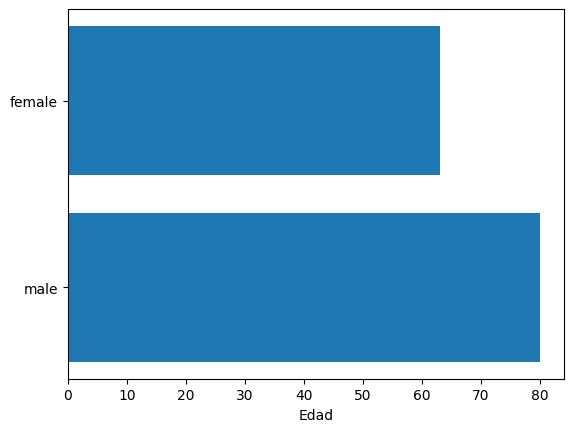

In [ ]:
fig, ax = plt.subplots()
ax.barh(y=pl_df["Sex"],
        width= pl_df["Age"])
ax.set_xlabel("Edad")


In [ ]:
import seaborn as sns

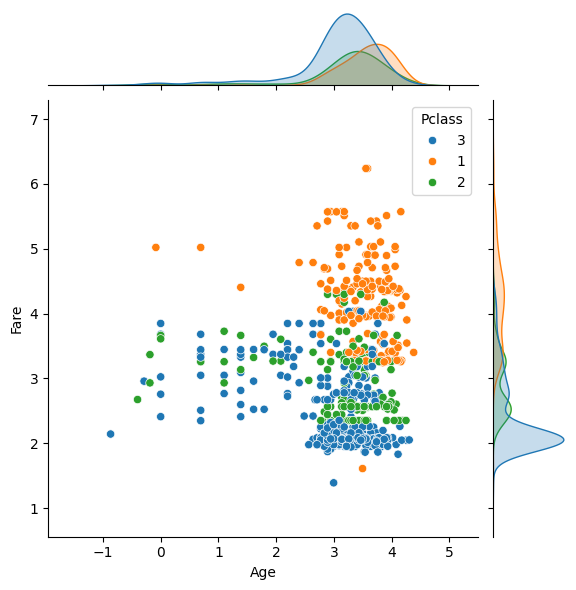

In [ ]:
sns.jointplot(data=(pl_df.with_columns(
            [
                pl.col(pl.Float64).log(),
                pl.col("Pclass").cast(pl.Utf8)
            ]
        ).to_pandas()
    ),
    x="Age",
    y="Fare",
    hue="Pclass",
)

# Probemos el dataset largo de ~5GB

In [ ]:
large_file="/content/drive/MyDrive/dataset_polars/202304.csv"

In [ ]:
large_polars_df = pl.read_csv(large_file)

In [ ]:
large_pandas_df = pd.read_csv(large_file)

In [ ]:
large_polars_df = pl.scan_csv(large_file)